Standard Error: 0.10304391618210137
Bias: 0.0066314710014936246
Coefficient of Variation: 0.06435577419024283
Original Theta Estimate: -0.07130609590256017


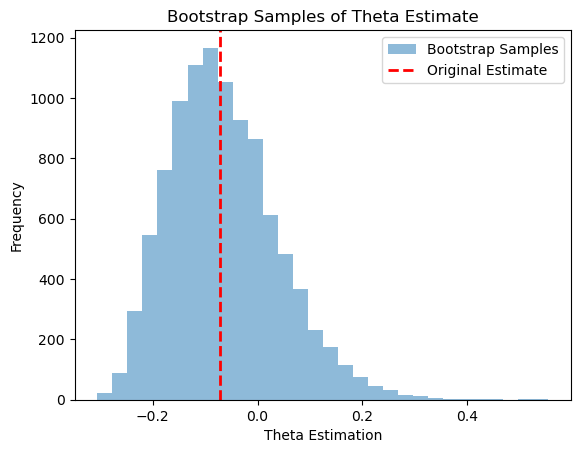

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([ 8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238 ])
Y = np.array([ -1200, 2601, -2705, 1982, -1290, 351, -638, -2719 ])

B = 10000
N = len(Z)  # size of your arrays Z and Y

theta_est = np.mean(Y) / np.mean(Z)

bootstrap_samples = []

indices = np.arange(N)  # generate an array of indices from 0 to N-1

for _ in range(B):
    bootstrap_indices = np.random.choice(indices, size=N)  # bootstrap sampling of indices
    sample_Z = Z[bootstrap_indices]  # get corresponding values from Z
    sample_Y = Y[bootstrap_indices]  # get corresponding values from Y
    bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
    bootstrap_samples.append(bootstrap_theta_est)

bootstrap_samples = np.array(bootstrap_samples)

# calculate the standard error
se = np.std(bootstrap_samples, ddof=1)
print("Standard Error:", se)

# calculate the bias
bias = np.mean(bootstrap_samples) - theta_est
print("Bias:", bias)

# calculate the coefficient of variation
cv = bias / se
print("Coefficient of Variation:", cv)

# print original theta_est
print("Original Theta Estimate:", theta_est)

# plot histogram
plt.hist(bootstrap_samples, bins=30, alpha=0.5, label='Bootstrap Samples')
plt.axvline(theta_est, color='r', linestyle='dashed', linewidth=2, label='Original Estimate')
plt.xlabel('Theta Estimation')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Bootstrap Samples of Theta Estimate')
plt.show()
